In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from pandas_datareader import data
from datetime import datetime
import pytz

import matplotlib.pyplot as plt

np.random.seed(0)

Using TensorFlow backend.
D:\Anaconda3\envs\myenv\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i:(i+look_back),0])
        dataY.append(dataset[i+look_back,0])
        
    return np.array(dataX), np.array(dataY)

In [8]:
start = datetime(2015,1,1,0,0,0,0,pytz.utc)
end = datetime(2016,1,1,0,0,0,0,pytz.utc)
spy = data.DataReader("SPY","yahoo",start,end)
dataset = np.array(spy['Close'].values).reshape(-1,1)
dataset = dataset.astype('float32')
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,208.190002,205.389999,207.990005,205.539993,130333800.0,185.170166
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,185.071075
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,181.728745
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,180.017090
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,182.260269


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [10]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [12]:
#reshape
look_back = 10
X_train, y_train = create_dataset(train,look_back)
X_test, y_test = create_dataset(test,look_back)
#reshape for lstm[samples,timesteps,features]
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [13]:
model = Sequential()
model.add(LSTM(32,input_dim=1))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, y_train, nb_epoch=100, batch_size=5, verbose=2)

D:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
D:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, input_shape=(None, 1))`
  
D:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
 - 4s - loss: 0.1194
Epoch 2/100
 - 0s - loss: 0.0157
Epoch 3/100
 - 0s - loss: 0.0125
Epoch 4/100
 - 0s - loss: 0.0123
Epoch 5/100
 - 0s - loss: 0.0125
Epoch 6/100
 - 0s - loss: 0.0118
Epoch 7/100
 - 0s - loss: 0.0118
Epoch 8/100
 - 0s - loss: 0.0115
Epoch 9/100
 - 0s - loss: 0.0112
Epoch 10/100
 - 0s - loss: 0.0117
Epoch 11/100
 - 0s - loss: 0.0124
Epoch 12/100
 - 0s - loss: 0.0110
Epoch 13/100
 - 0s - loss: 0.0114
Epoch 14/100
 - 0s - loss: 0.0108
Epoch 15/100
 - 0s - loss: 0.0102
Epoch 16/100
 - 0s - loss: 0.0113
Epoch 17/100
 - 0s - loss: 0.0103
Epoch 18/100
 - 0s - loss: 0.0096
Epoch 19/100
 - 0s - loss: 0.0097
Epoch 20/100
 - 0s - loss: 0.0104
Epoch 21/100
 - 0s - loss: 0.0097
Epoch 22/100
 - 0s - loss: 0.0093
Epoch 23/100
 - 0s - loss: 0.0090
Epoch 24/100
 - 0s - loss: 0.0088
Epoch 25/100
 - 0s - loss: 0.0085
Epoch 26/100
 - 0s - loss: 0.0094
Epoch 27/100
 - 0s - loss: 0.0087
Epoch 28/100
 - 0s - loss: 0.0084
Epoch 29/100
 - 0s - loss: 0.0080
Epoch 30/100
 - 0s - lo

In [21]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [28]:
train_pred = scaler.inverse_transform(train_pred)
y_train.reshape(1,-1)
y_train = scaler.inverse_transform(y_train)
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.44796038 0.54746485 0.56385803 0.60274506 0.7178807  0.6747999
 0.6930995  0.5897832  0.4906597  0.56118965 0.46435356 0.5585208
 0.6698437  0.6401067  0.7186427  0.6969123  0.66183805 0.7449484
 0.74952316 0.8253908  0.85817766 0.87075853 0.8715215  0.8658023
 0.9138398  0.9126954  0.93557024 0.9287076  0.9191766  0.891727
 0.9424329  0.9092641  0.8753333  0.88410234 0.77125454 0.8040414
 0.6751809  0.65688133 0.7560048  0.70758677 0.81242895 0.78879166
 0.88410234 0.8475032  0.88219595 0.8665652  0.821579   0.7049179
 0.68623734 0.7041559  0.7998476  0.7304611  0.7026305  0.7308426
 0.7838354  0.762867   0.7895541  0.82462835 0.86809015 0.831872
 0.8471222  0.88295794 0.880671   0.7884102  0.860847   0.8513155
 0.8905835  0.910789   0.9294696  0.89592123 0.92146444 0.8882966
 0.8078542  0.89401484 0.91688967 0.82462835 0.7918415  0.8234844
 0.92832613 0.8898206  0.8658023  0.86732817 0.95082045 0.9595885
 0.9847503  0.9820819  0.97636366 1.0000005  0.98055696 0.8932519
 0.969501   0.96035147 0.910027   0.9264207  0.9184146  0.93976355
 0.8715215  0.85779667 0.80861616 0.8074722  0.9027829  0.9287076
 0.86694574 0.83263445 0.87609625 0.8890586  0.97255087 0.89744616
 0.9386201  0.9443383  0.88562727 0.8612275  0.85970306 0.69195604
 0.7083497  0.77125454 0.7640109  0.74151754 0.79107904 0.65802526
 0.67213106 0.7704916  0.85779667 0.89248896 0.8898206  0.9542508
 0.96111345 0.96530676 0.9332824  0.9187951  0.8734269  0.7903166
 0.7441859  0.841022   0.89592123 0.8978276  0.88562727 0.85855865
 0.8429284  0.86923456 0.8036604  0.7884102  0.8882966  0.8158598
 0.8253908  0.8154788  0.84445286 0.8890586  0.8658023  0.80251646
 0.63667583 0.40259266 0.0850172  0.         0.27411413 0.45749187
 0.45787287 0.39649248].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:,:] = np.nan
train_pred_plot[look_back:len(train_pred)+look_back,:] = train_pred

test_pred_plot = np.empty_like(dataset)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_pred)+(look_back*2)+1:len(dataset)-1,:] = test_pred

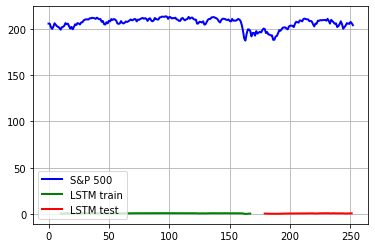

In [24]:
plt.figure()
plt.plot(scaler.inverse_transform(dataset), color='b', lw=2.0, label='S&P 500')
plt.plot(train_pred_plot, color='g', lw=2.0, label='LSTM train')
plt.plot(test_pred_plot, color='r', lw=2.0, label='LSTM test')
plt.legend(loc=3)
plt.grid(True)
